In [151]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

In [152]:
# Initialize all the basic variables that we'll need for all of the different waves
# The DDS will be clocked with a 12.5 MHz signal from the PIO, and there will be 1024 samples allocated per waveform.

# Greater resolution could be achieved by using a faster clock (the chip supports up to 180 MHz), using the entire SRAM space (4096 samples)
# or in the case of sine waves, using the DDS output itself. The downside to the latter is that the DDS is shared between all DACs.

time_slice = 1 / (12.5e6) # 12.5 MHz DDS base clock
freq = 50e3 # Desired frequency
bit_depth = 12
max = (np.power(2, bit_depth-1) - 1) # Maximum value based on bit depth (n-bit signed int)
phase = np.deg2rad(90) / (2 * np.pi * freq)
time = np.empty(1024)
theta = np.empty(1024)
for i in range(0, 1024):
    time[i] = i * time_slice
    theta[i] = (2 * np.pi * freq) * (time[i] + phase) # sin(2*pi*f*(t + phi))

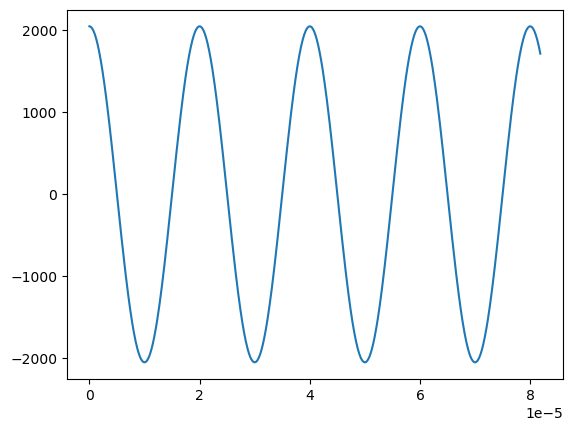

In [153]:
# Create a sine and convert it to a 12-bit signed integer representation. (-max, max)
sine_wave = np.rint (max * np.sin(theta)) # Must be in integer form to transfer to the DDS SRAM
fig, ax = plt.subplots()
ax.plot(time, sine_wave)
# The amplitude of the wave can be adjusted by using the gain registers on the AD9106

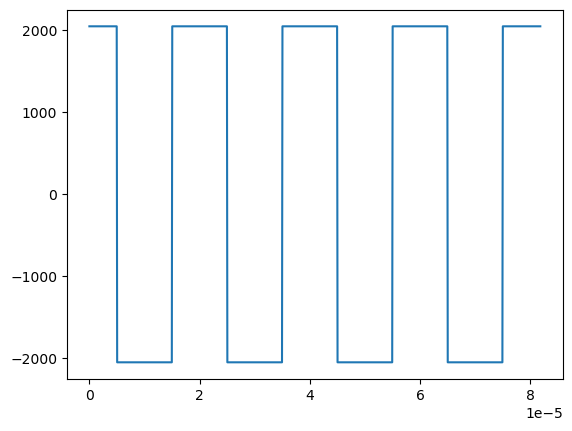

In [154]:
# Create a square wave and convert it to a 12-bit signed integer representation. (-max, max)
square_wave = np.rint(max * sig.square (theta, duty=0.5))
fig, ax = plt.subplots()
ax.plot(time, square_wave)

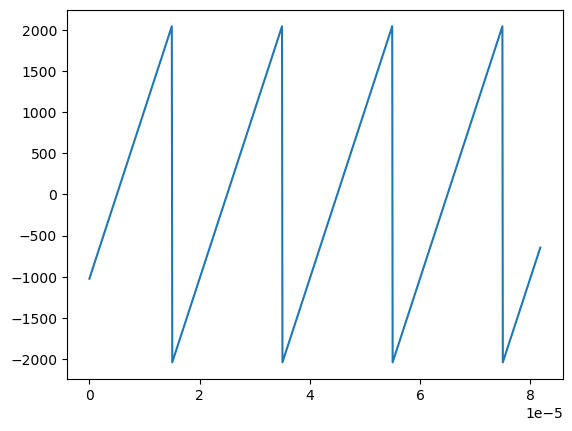

In [155]:
# The AD9106 actually has a built-in sawtooth generator that can generate ramp up, ramp down, triangle, and sawtooth waves.
# However, to ease the burden of dealing with those registers, we will just generate those waves here in Python,
# using the same pipeline we are using to generate other arbitrary waves.
# Ramp-up Sawtooth
saw_up_wave = np.rint(max * sig.sawtooth (theta, width=1))
fig, ax = plt.subplots()
ax.plot(time, saw_up_wave)

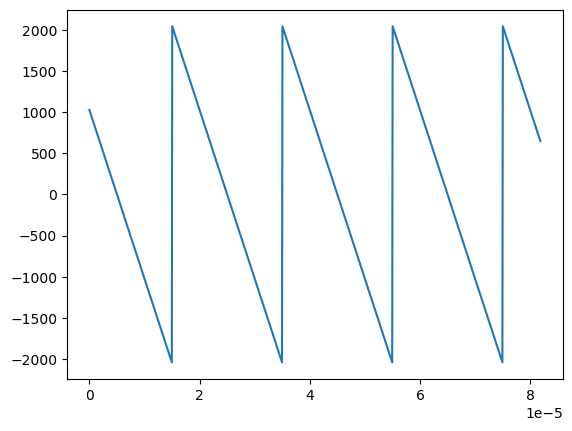

In [156]:
# Ramp-down Sawtooth
saw_down_wave = np.rint(max * sig.sawtooth (theta, width=0))
fig, ax = plt.subplots()
ax.plot(time, saw_down_wave)

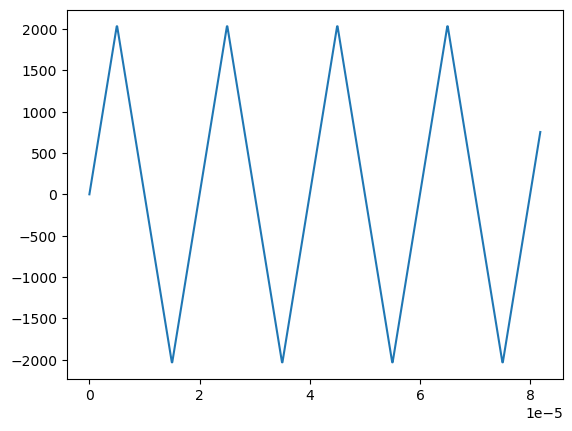

In [157]:
# Triangle Wave
saw_up_wave = np.rint(max * sig.sawtooth (theta, width=0.5))
fig, ax = plt.subplots()
ax.plot(time, saw_up_wave)